<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h3><center>Andrey Shestakov (<a href="mailto:avshestakov@hse.ru">avshestakov@hse.ru</a>)</center></h3>
<hr>
<h2><center>Supervised learning quality measures<sup><a href="#fn1" id="ref1">1</a></sup></center></h2>



<sup id="fn1">1. Some materials are taken from <a href="http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%92.%D0%92.%D0%9A%D0%B8%D1%82%D0%BE%D0%B2%29">machine learning course of Victor Kitov</a></sup>

In [15]:
%matplotlib inline


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (15,10)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

from ipywidgets import interact, IntSlider, fixed, FloatSlider
    
import warnings
warnings.filterwarnings('ignore')

# Let's recall previous lecture

* Linear Classification
    * Binary linear classifier: $g(x) = w^{T}x+w_{0}$
    * Classification $\widehat{y}(x)=sign(w^{T}x+w_{0})$
    * Various multiclassification approaches: 1-vs-all, 1-vs-1, etc..
* Perceptron, logistic, SVM - linear classifiers estimated with different loss functions
* Loss function for logistic regression is log-loss
    * $L(g(x), y) = \sum_{n=1}^{N}\ln(1+e^{-y_ng(x_n)})\to\min_{w}$
* Optimized with gradient descent

# Model Selection

<center><img src='http://www.modelselection.org/mu031.jpg' width=700></center>

# Model Selection

* If we have several models we need to understand which one is better then the other

* Check if ML model is performed better then simple heuristics or (almost) zero-information prediction, or simple baseline models
    * Always predict the majority class (classification)
    * Always predict the mean value (regression)
    * Build a simple model and compare its performance with your sophisticated model

* If performance of complex model is similar to performance of more simplistic model use the latter!

* Understand the profit of our model in business domain (see [this](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/))

## Before we go
### Recall the difference between loss function and quality measures

* Loss functions are directly optimized by algorithms
* Loss functions allways can be computed for a single object
* Quality measures are usually computed for a set of objects

# Quality measures: Regression


**1. (R)MSE ((Root) Mean Squared Error)**

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_{n=1}^N (y_n - \hat{y}_n)^2$$

**2. MAE (Mean Absolute Error)**

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_{n=1}^N |y_n - \hat{y}_n|$$

* What are key differences?
* What are key issues?

## MAE and MSE

* Different scales 
* MSE penalize greater error more
* MAE is robust to outliers
<center><img src='img/metric-example.png'></center>

* We can compare models with MAE and MSE but it is hard to tell if a model is good overall...

**3. RSE (Relative Squared Error)**

$$ L(\hat{y}, y) = \sqrt\frac{\sum\limits_{n=1}^N (y_n - \hat{y}_n)^2}{\sum\limits_{n=1}^N (y_n - \bar{y})^2}$$

**4. RAE (Relative Absolute Error)**

$$ L(\hat{y}, y) = \frac{\sum\limits_{n=1}^N |y_n - \hat{y}_n|}{\sum\limits_{n=1}^N |y_n - \bar{y}|}$$

**5. MAPE (Mean Absolute Persentage Error)**

$$ L(\hat{y}, y) = \frac{100}{N} \sum\limits_{n=1}^N\left|\frac{ y_n - \hat{y}_n}{y_n}\right|$$




**6. RMSLE (Root Mean Squared Logarithmic Error)**

$$ L(\hat{y}, y) = \sqrt{\frac{1}{N}\sum\limits_{n=1}^N(\log(y_n + 1) - \log(\hat{y}_n + 1))^2}$$

* what is so special about it?

(0, 10)

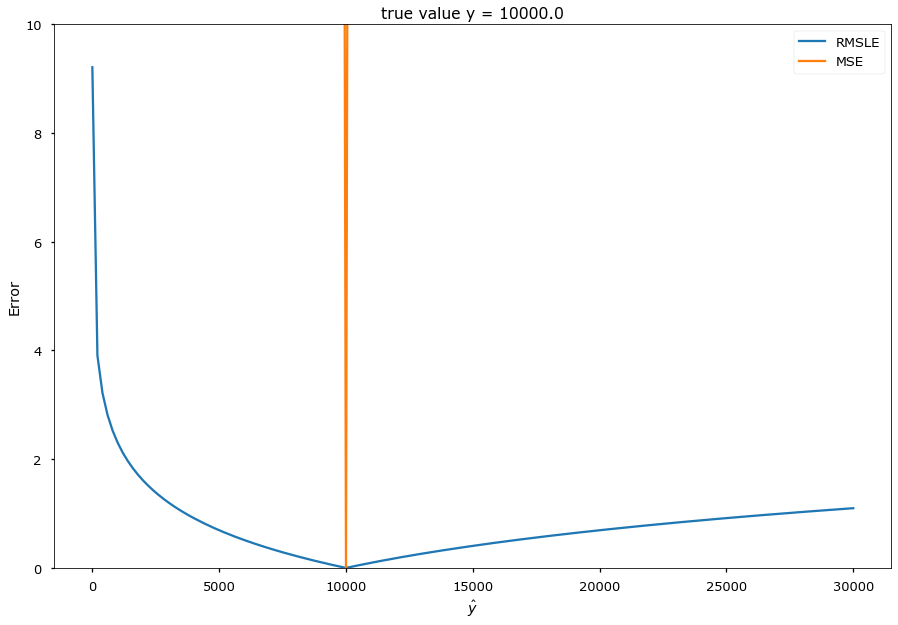

In [17]:
y = 10000
y_hat = np.linspace(0, 30000, 151)
# log error
error1 = np.sqrt((np.log(y+1) - np.log(y_hat + 1))**2)

# squared error
error2 = (y - y_hat)**2 /1000.

plt.plot(y_hat, error1, label='RMSLE'); plt.plot(y_hat, error2, label='MSE'); plt.xlabel('$\hat{y}$'); plt.ylabel('Error')
plt.title('true value y = %.1f' % y); plt.legend(); plt.ylim(0, 10)

## More complex options: domain specific quality measures

<center><img src='https://www.askideas.com/media/46/Funny-Money-Meme-Show-Me-The-Money-Picture.jpg' width=900></center>

## Stock optimization task
* Some retail chain wants to optimize stock replenishments of different items
* For items we have characteristics like price, "best before" period, holding costs
* We want to build predictive model to forecast demand for each item and use it to put orders on our goods in the most optimal way


* What risks (potential losses) can retail chain meet?
* What real life factors can be considered in this case and how do we measure quality?

# Quality measures: Classification


## Confusion matrix

Confusion matrix $M=\{m_{ij}\}_{i,j=1}^{C}$ shows the number of $\omega_{i}$
class objects predicted as belonging to class $\omega_{j}$.

<center><img src='img/confusion.png'><center/>

Diagonal elements correspond to correct classifications and off-diagonal
elements - to incorrect classifications.

## Confusion matrix

<center><img src='img/confusion2.png' width=500></center>

* We see here that errors are conсentrated between classes 1 and 2
* We can
    * unite classes 1 and 2 into class "1+2"
    * solve 6-class classification problem (instead of 7)
    * try to separate classes 1 and 2 afterwards

## 2 classes case


<center><img src='img/binary_conf.png'></center>

* TP (true positive) - currectly predicted positives
* FP (false positive) - incorrectly predicted negatives (1st order error)
* FN (false negative) - incorrectly predicted positives (2nd order error)
* TN (true negative) - currectly predicted negatives
* Pos (Neg) - total number of positives (negatives)

* Provide examples of task with positive classes and negative classes

* Why do you define them in that way and not another?

## 2 classes case

<center><img src='img/binary_conf.png'></center>

* $ \text{accuracy} = \frac{TP + TN}{Pos+Neg}$
* $ \text{error rate} = 1 -\text{accuracy}$
* $ \text{precision} =\frac{TP}{TP + FP}$ - (точность)
    * Ratio of objects marked positive are actually positive
* $ \text{recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$ - (полнота)
    * Ratio of positive objects currectly classified
* $ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$
    * why harmonic mean?



* What about multiclassification case?

In [4]:
from mpl_toolkits.mplot3d import Axes3D


def demo_fscore(beta=1):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    prec = np.linspace(0, 1, 100)
    rec = np.linspace(0, 1, 100)
    
    P, R = np.meshgrid(prec, rec)
    
    F = (1 + beta**2) * (P*R)/((beta**2 * P) + R)
    
    # Plot the surface.
    surf = ax.plot_surface(P, R, F, cmap=plt.cm.coolwarm, alpha=0.3,
                               linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.01, 1.01)
    
    ax.view_init(30,200)
    ax.set_xlabel('precision')
    ax.set_ylabel('recall')
    ax.set_zlabel('F-score')
    ax.set_title('beta = %.2f'%beta)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf)
    plt.show()
    
   

In [18]:
fig = interact(demo_fscore, beta=FloatSlider(min=0.1, max=5, step=0.2, value=1))

interactive(children=(FloatSlider(value=1.0, description='beta', max=5.0, min=0.1, step=0.2), Output()), _dom_…

## Discriminant decision rules

* Decision rule based on discriminant functions: 
    * predict $\omega_{1}$ $\Longleftrightarrow$ $g_{1}(x)-g_{2}(x)>\mu$
    * predict $\omega_{1}$ $\Longleftrightarrow$ $g_{1}(x)/g_{2}(x)>\mu$ (for $g_{1}(x)>0,\,g_{2}(x)>0$)

* Decision rule based on probabilities:
    * predict $\omega_{1}$ $\Longleftrightarrow$$P(\omega_{1}|x)>\mu$

## Class label versus class probability evaluation

* **Discriminability quality measures evaluate class label prediction.**
    * examples: error rate, precision, recall, etc..


* **Reliability quality measures** evaluate class probability prediction.
    * Example: probability likelihood:
    $$
        \prod_{n=1}^{N}\widehat{p}(y_{n}|x_{n})
    $$
    * Brier score:
    $$
        \frac{1}{N}\sum_{n=1}^{N}\sum_{c=1}^{C}\left(\mathbb{I}[y_{n}=c]-\widehat{p}(y=c|x_{n})\right)^{2}
    $$
    * Logloss (cross entropy):
    $$
        \frac{1}{N}\sum_{n=1}^{N}\sum_{c=1}^{C}\mathbb{I}[y_{n}=c]\ln(\widehat{p}(y=c|x_{n}))
    $$


## ROC curve

* ROC curve - is a function TPR(FPR).
* It shows how the probability of correct classification on positive classes ("recognition rate") changes with probability of incorrect classification on negative classes ("false alarm"). 
* It is build as a set of points TPR($\mu$), FPR($\mu$).
* If $\mu \downarrow$ , the algorithm predicts $\omega_{1}$ more often and
    * TPR=$1-\varepsilon_{1}$ $\uparrow$
    * FPR=$\varepsilon_{2}$ $\uparrow$

* Characterizes classification accuracy for different $\mu$.
    * more concave ROC curves are better

* $TPR = \frac{TP}{TP + FN}=\frac{TP}{Pos}$
* $FPR = \frac{FP}{FP + TN} = \frac{FP}{Neg}$

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"><img src='img/roc1.png'></th>
    <th class="tg-031e"><img src='img/roc2.png'></th>
  </tr>
</table>




## How to compare ROCs?
<center><img src='img/roc3.png'></center>

## ROC-AUC
* Area under the ROC curve

* Global quality characteristic for different $\mu$
* AUC$\in[0,1]$
    * AUC = 0.5 - equivalent to random guessing
    * AUC = 1 - no errors classification.

* AUC property: it is equal to probability that for 2 random objects $x_{1}\in \text{"+"}$ and $x_{2}\in \text{"-"}$ it will hold that: $\widehat{p}(+|x_{1})>\widehat{p}(+|x_2)$

* What about unbalanced case?


## Precision Recall Curve

* Build in the same manner as ROC curve
* Consider computing PR-AUC

<center><img src='http://scikit-learn.org/stable/_images/sphx_glr_plot_precision_recall_001.png'></center>

## Model Lift

* Let $r_{POS}$ - positive class rate in the whole dataset
* Let $TPR @ K\%$ be positive class rate in top $K \%$ segment of the dateset, sorted by score

 $$ Model Lift @ K\% = \frac{TPR @ K\%}{r_{POS}} $$

<center><img src='http://jesshampton.com/wp-content/uploads/2013/11/lift_chart.png' width=700></center>

# Multiclassification averaging

* In multiclassification domain we can compute quality measures for each class in One-vs-All fasion
* Can we some how **aggregate** those values?
    * Micro-average
    * Macro-average
    * Weighted-average

### Micro-average
* "Averaging over samples"

* For each class $c$ consider its confusion matrix 
<center><img src='img/binary_conf.png'></center>
* Calculate $TP_c$, $TN_c$, $FP_c$, $FN_c$
* Calculate global measures as sum: 
    * $TP = \sum_c TP_c$
    * $TN = \sum_c TN_c$
    * $FP = \sum_c FP_c$
    * $FN = \sum_c FN_c$
* Calculate final mesure (Recall, Presicion, etc) based on them
    

### Macro-average
* "Averaging over classes"

* For each class $c$ consider its confusion matrix 
<center><img src='img/binary_conf.png'></center>
* Calculate $TP_c$, $TN_c$, $FP_c$, $FN_c$
* Calculate measure (Recall, Presicion, etc) for each class individually
    * $\text{Recall}_c$
    * $\text{Presicion}_c$
    * $\text{F-score}_c$
* Calculate final mesure (Recall, Presicion, etc) as average
    

### Weighted-average
* "Averaging over classes but with their representation rate"

* For each class $c$ consider its confusion matrix 
<center><img src='img/binary_conf.png'></center>
* Calculate $TP_c$, $TN_c$, $FP_c$, $FN_c$
* Calculate measure (Recall, Presicion, etc) for each class individually
    * $\text{Recall}_c$
    * $\text{Presicion}_c$
    * $\text{F-score}_c$
* Calculate class weight as $w_c=\frac{|c|}{N}$
* Calculate final mesure (Recall, Presicion, etc) as weighted average
    

In [6]:
from sklearn import metrics

In [7]:
C="Coronavirus"
F="Flue"
O="Ok"

y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, O,O,O,O,O,O,O,O,O]
y_pred = [C,C,C,C,O,F, C,C,C,C,C,C,O,O,F,F, C,C,C,O,O,O,O,O,O]

print(metrics.confusion_matrix(y_true, y_pred))

print(metrics.classification_report(y_true, y_pred, digits=3))

[[4 1 1]
 [6 2 2]
 [3 0 6]]
              precision    recall  f1-score   support

 Coronavirus      0.308     0.667     0.421         6
        Flue      0.667     0.200     0.308        10
          Ok      0.667     0.667     0.667         9

    accuracy                          0.480        25
   macro avg      0.547     0.511     0.465        25
weighted avg      0.581     0.480     0.464        25



In [8]:
# Each column represents a class,
# Each row - an object
y_true = np.array([[0,1,0],
                   [0,1,1],
                   [1,0,1],
                   [0,0,1],
                   [0,0,0]])

y_pred = np.array([[0,1,1],
                   [0,1,1],
                   [0,1,0],
                   [0,0,0],
                   [1,0,1]])

print(metrics.classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000         1
           1      0.667     1.000     0.800         2
           2      0.333     0.333     0.333         3

   micro avg      0.429     0.500     0.462         6
   macro avg      0.333     0.444     0.378         6
weighted avg      0.389     0.500     0.433         6
 samples avg      0.300     0.400     0.333         6



* Macro-averaging gives equal weight to each class
* Micro-averaging gives equal weight to each per-class classification decision
* Micro-averaging tends to over-emphasize the performance on the largest classes, while macro-averaging over-emphasizes the performance on the smallest

## Useful links

* [MAE vs MSE](http://yahwes.github.io/2016/03/22/mae-rmse/)
* [Intro to ROC Analysis](https://ccrma.stanford.edu/workshops/mir2009/references/ROCintro.pdf)
* [Geometry of ROC Curve](http://www.aaai.org/Papers/ICML/2003/ICML03-028.pdf)
* [Illustrated Guide to ROC Curves](http://www.joyofdata.de/blog/illustrated-guide-to-roc-and-auc/)
* [ML meets ecomomics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)